<a href="https://colab.research.google.com/github/kkoding-couple/Team-Notes/blob/main/%5B%EA%B2%BD%EC%98%81%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D%5D_R_%EC%8B%9C%EA%B0%81%ED%99%94_%EB%8F%84%EA%B5%AC%2C_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R 시각화 도구, ggplot2

> ggplot2 패키지:<br>
* 통계 프로그래밍 언어 R에 대한 데이터 시각화 패키지

## 패키지 설치 및 준비

In [ ]:
# ggplot2 패키지 설치
install.packages("ggplot2")

In [ ]:
# ggplot2 패키지 불러오기
library(ggplot2)

## 그래프 그리기

> ggplot() 함수를 이용해 기본 그래프를 그려봅니다.

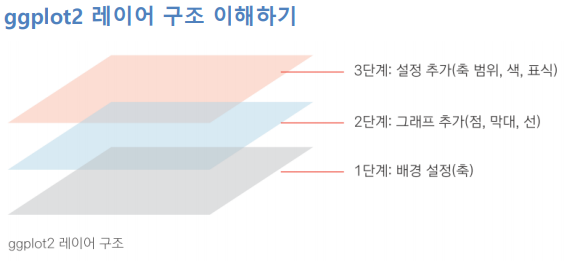

* 기본 형식 :　데이터(축)　+　그래프 종류　+　세부 설정

In [ ]:
# mpg 데이터: 자동차 제조회사들의 자동차 연비, 구동방식 등을 조사한 데이터
str(mpg)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


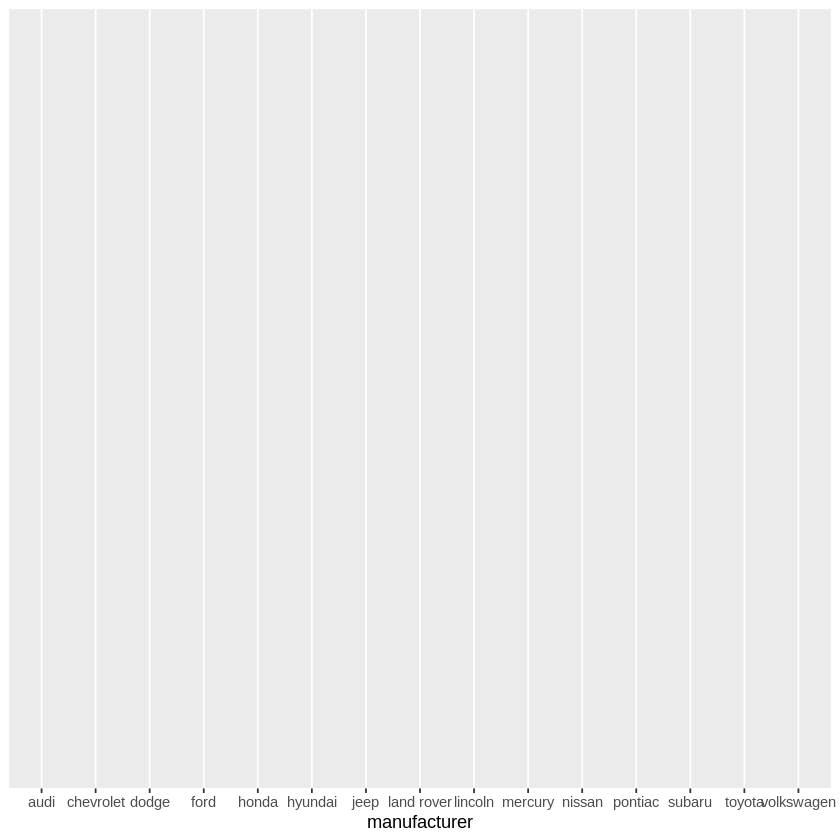

In [ ]:
# 데이터(축)
# ggplot(데이터 세트, aes(데이터 속성))
ggplot(mpg, aes(manufacturer))

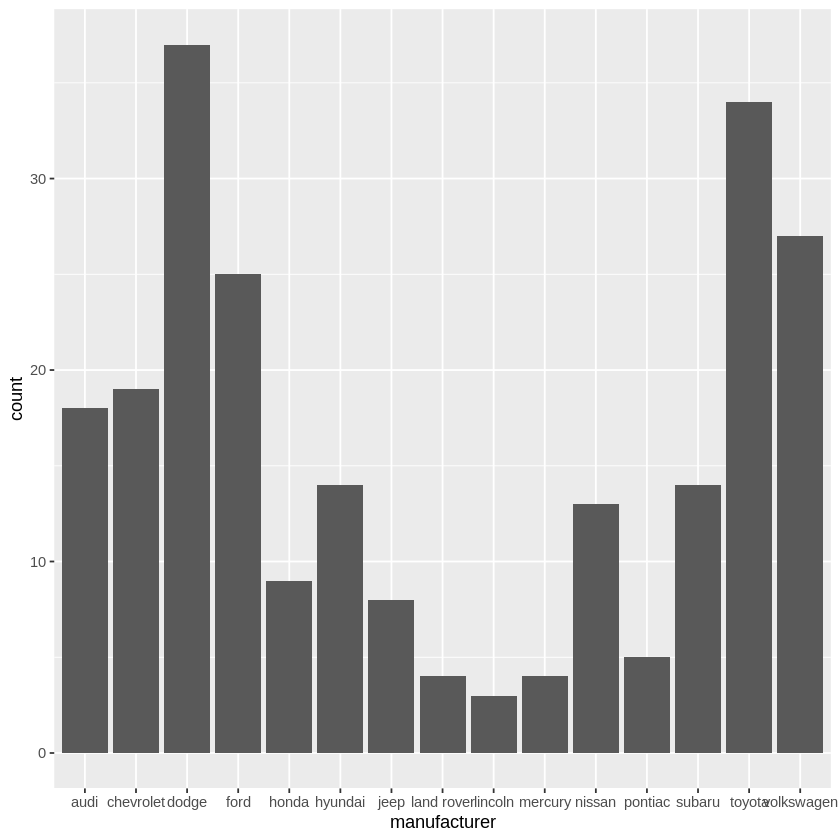

In [ ]:
# 데이터(축) + 그래프 종류
ggplot(mpg, aes(manufacturer)) + geom_bar()

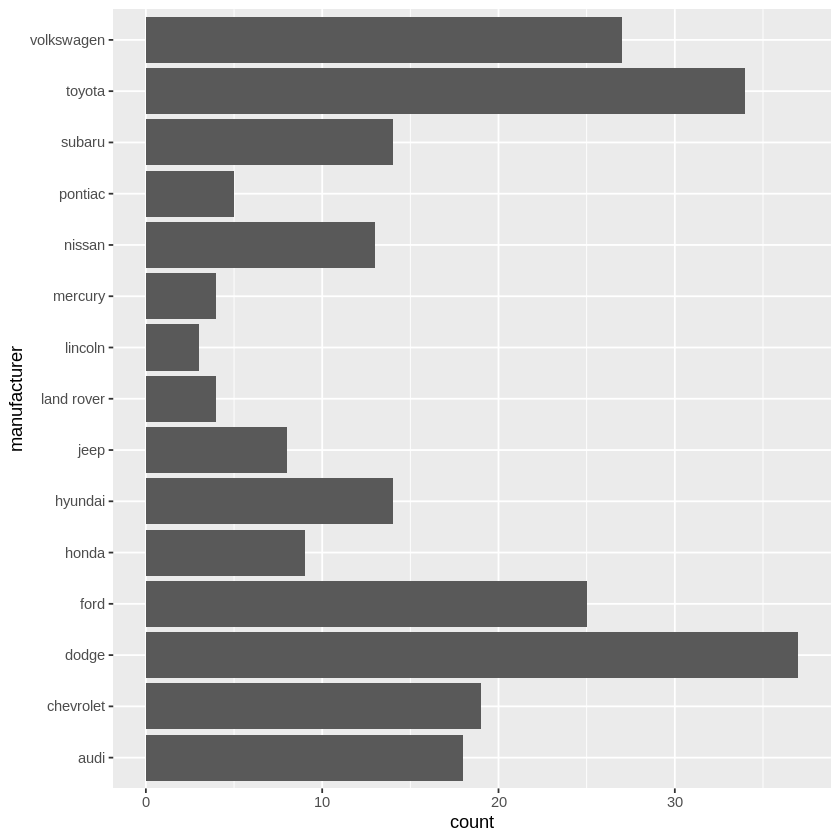

In [ ]:
# 데이터(축) + 그래프 종류 + 세부 설정
ggplot(mpg, aes(manufacturer)) + geom_bar() + coord_flip(clip = "off")

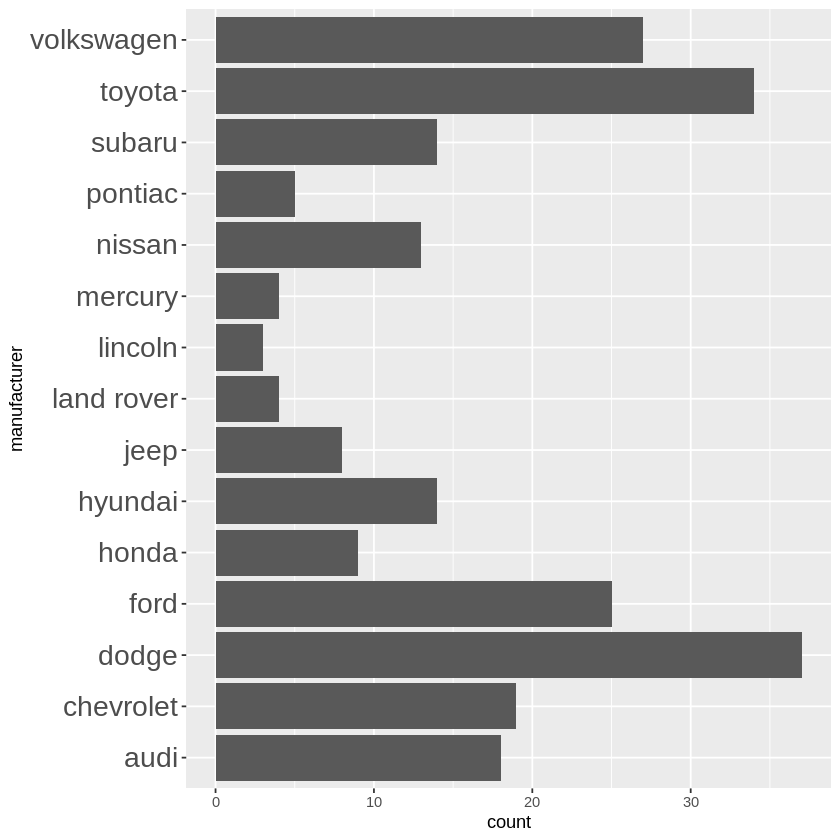

In [ ]:
# 데이터(축) + 그래프 종류 + 세부 설정1 + 세부 설정2
ggplot(mpg, aes(manufacturer)) + 
    geom_bar() + 
    coord_flip(clip = "off") + 
    theme(axis.text.y=element_text(size=17))

## 수량의 시각화 (Amounts)

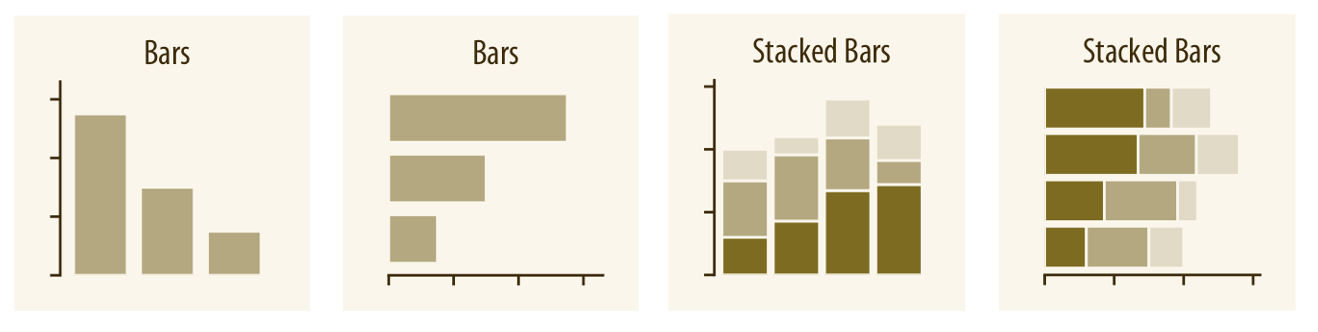

### 막대그래프

* 기본 그래프

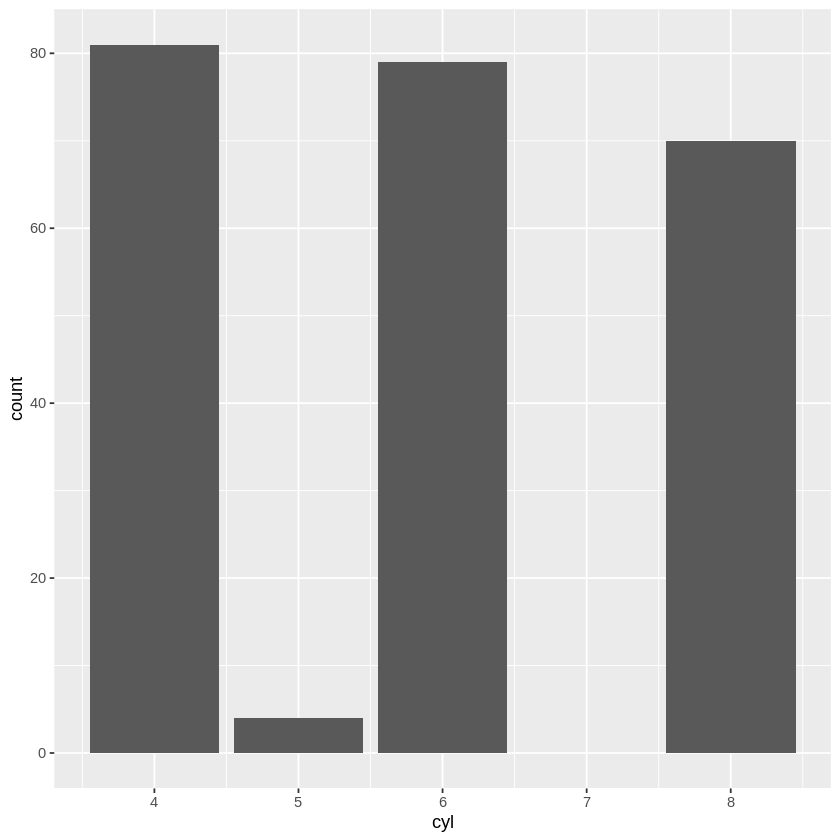

In [ ]:
# cyl(실린더) 종류별 빈도수 확인
ggplot(mpg, aes(cyl)) + geom_bar()

* 응용 그래프
> 박스오피스 데이터(2017.12)

In [ ]:
boxoffice <- data.frame(rank = 1:5,
                        title = c("Star Wars: The Last Jedi", "Jumanji: Welcome to the Jungle", "Pitch Perfect 3", "The Greatest Showman", "Ferdinand"),
                        title_short = c("Star Wars", "Jumanji", "Pitch Perfect 3", "Greatest Showman", "Ferdinand"),
                        amount = c(71565498, 36169328, 19928525, 8805843, 7316746),
                        amount_text = c("$71,565,498", "$36,169,328", "$19,928,525", "$8,805,843", "$7,316,746"))

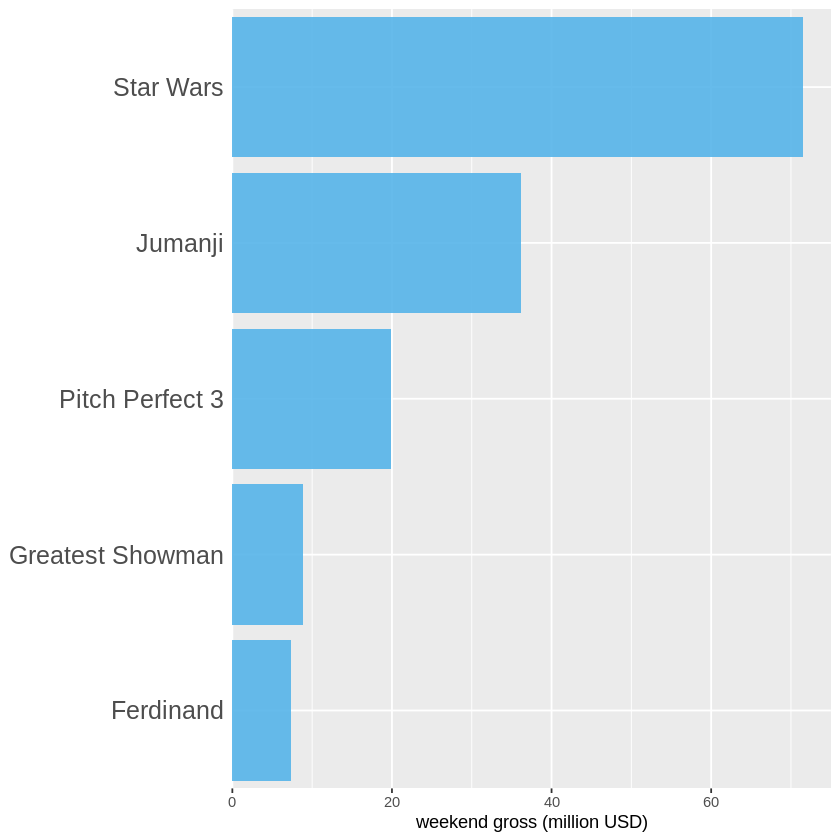

In [ ]:
ggplot(boxoffice, aes(x = reorder(title_short, -rank), y = amount)) +
  geom_col(fill = "#56B4E9", alpha = 0.9) +
  scale_y_continuous(limits = c(0, 7.5e7),
                     expand = c(0, 0),
                     breaks = c(0, 2e7, 4e7, 6e7),
                     labels = c("0", "20", "40", "60"),
                     name = "weekend gross (million USD)") +
  scale_x_discrete(name = NULL,
                   expand = c(0, 0.5)) +
  coord_flip(clip = "off") +
  theme(
    axis.line.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.text.y=element_text(size=15)
  )

### 누적 막대그래프

* 기본 그래프

In [ ]:
# mtcars 데이터: 32 종 자동차의 연비, 디자인, 성능 등을 조사한 데이터
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


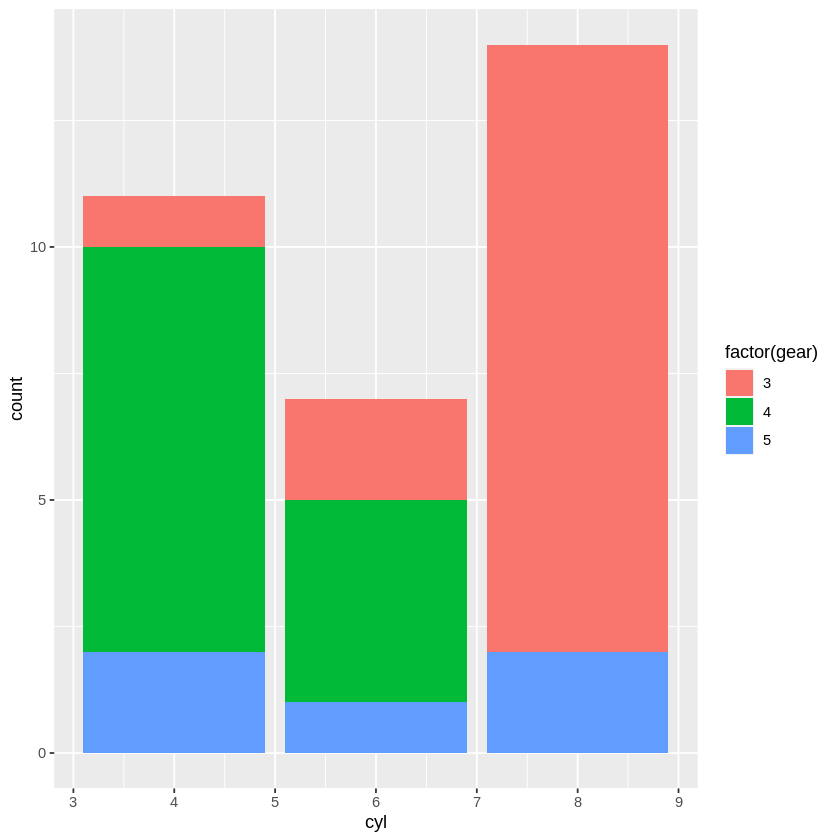

In [ ]:
# cyl(실린더) 종류별 gear(기어) 빈도 누적 막대그래프
ggplot(mtcars, aes(cyl)) + geom_bar(aes(fill=factor(gear)))

* 응용 그래프

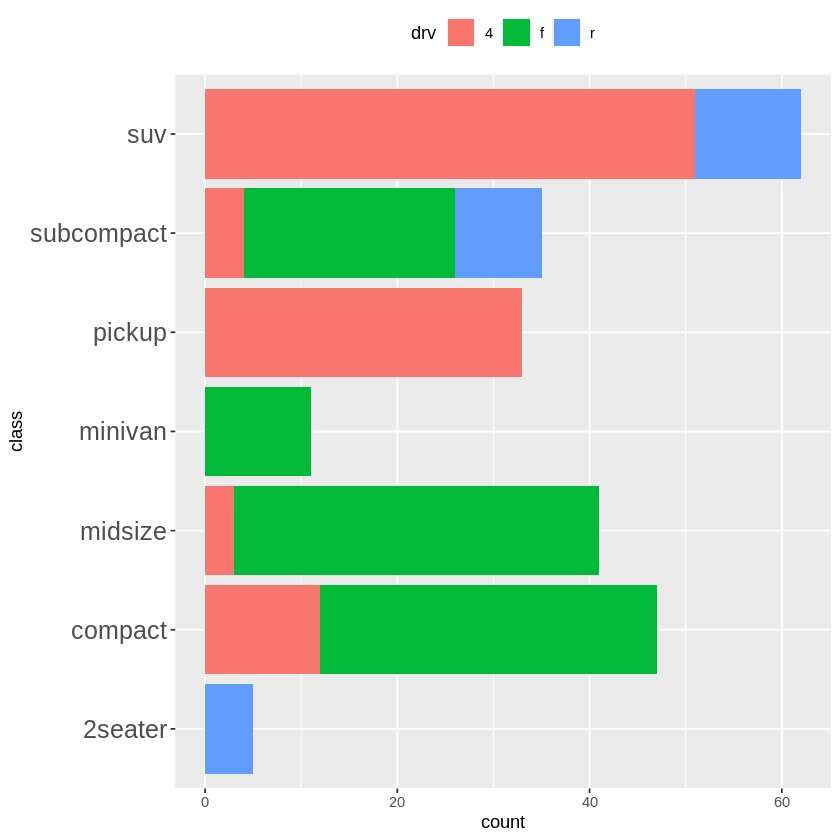

In [ ]:
ggplot(mpg, aes(y = class)) +
    geom_bar(aes(fill = drv), position = position_stack(reverse = TRUE)) +
    theme(
        legend.position = "top",
        axis.text.y=element_text(size=15)
    )

## 분포의 시각화 (Distributions)

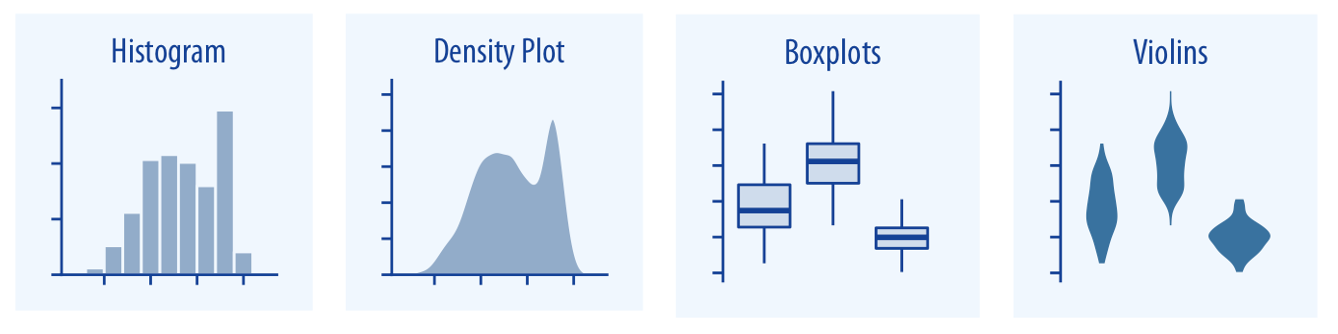

### 히스토그램

* 기본 그래프

In [ ]:
# airquality 데이터: 날짜별 공기 데이터
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


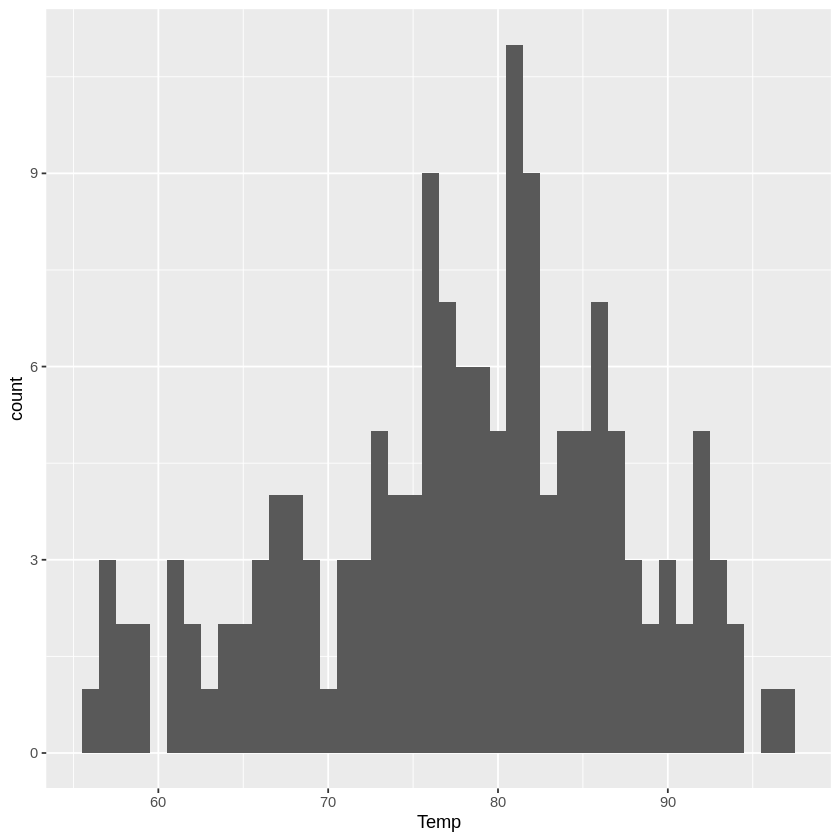

In [ ]:
# Temp(기온) 분포도
ggplot(airquality, aes(Temp)) + geom_histogram(binwidth=1)

### 밀도 그래프

* 기본 그래프

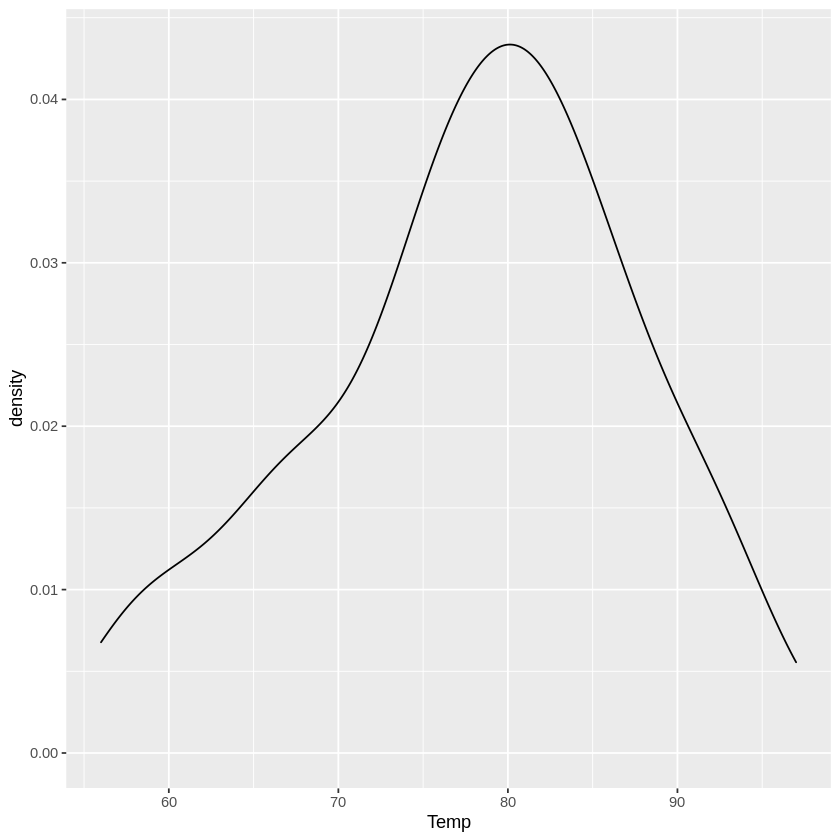

In [ ]:
 # Temp(기온) 분포도
ggplot(airquality, aes(Temp)) + geom_density()

* 응용 그래프

In [ ]:
# diamonds 데이터: 다이아몬드 속성 데이터
str(diamonds)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


Warning message:
“Removed 45 rows containing non-finite values (stat_density).”


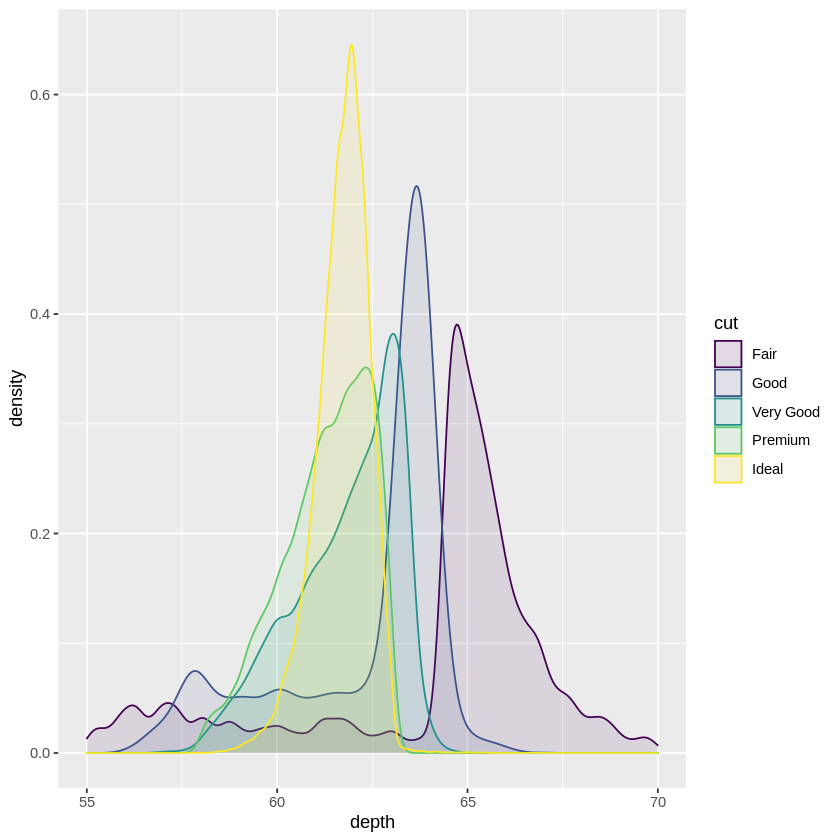

In [ ]:
ggplot(diamonds, aes(depth, fill = cut, colour = cut)) +
    geom_density(alpha = 0.1) +
    xlim(55, 70)

### 박스플롯

* 기본 그래프

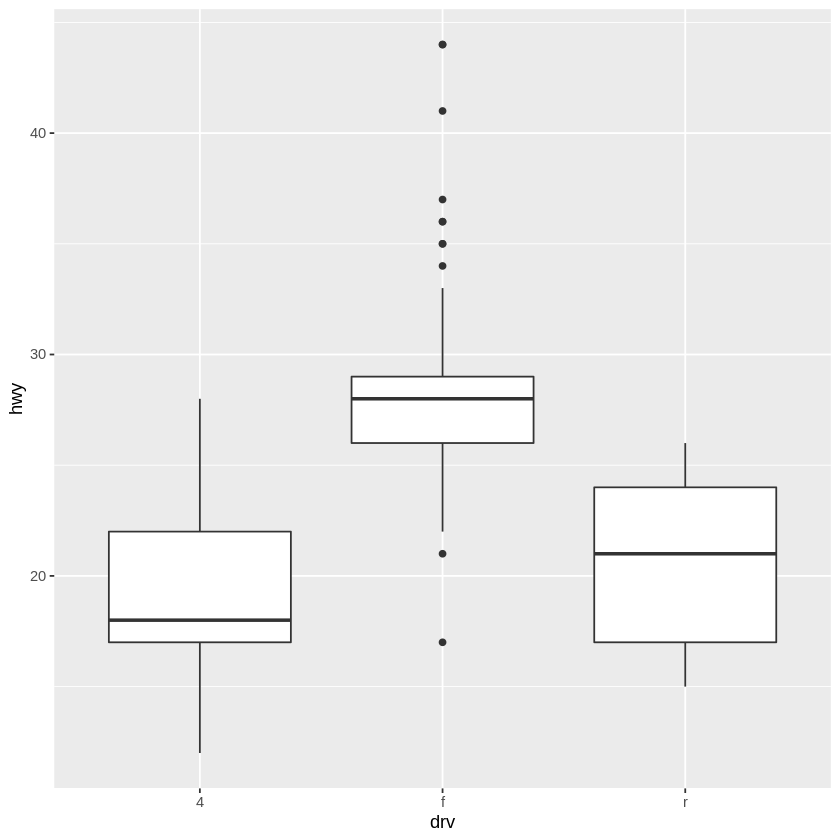

In [ ]:
ggplot(mpg, aes(x = drv, y = hwy)) + geom_boxplot()

* 응용 그래프

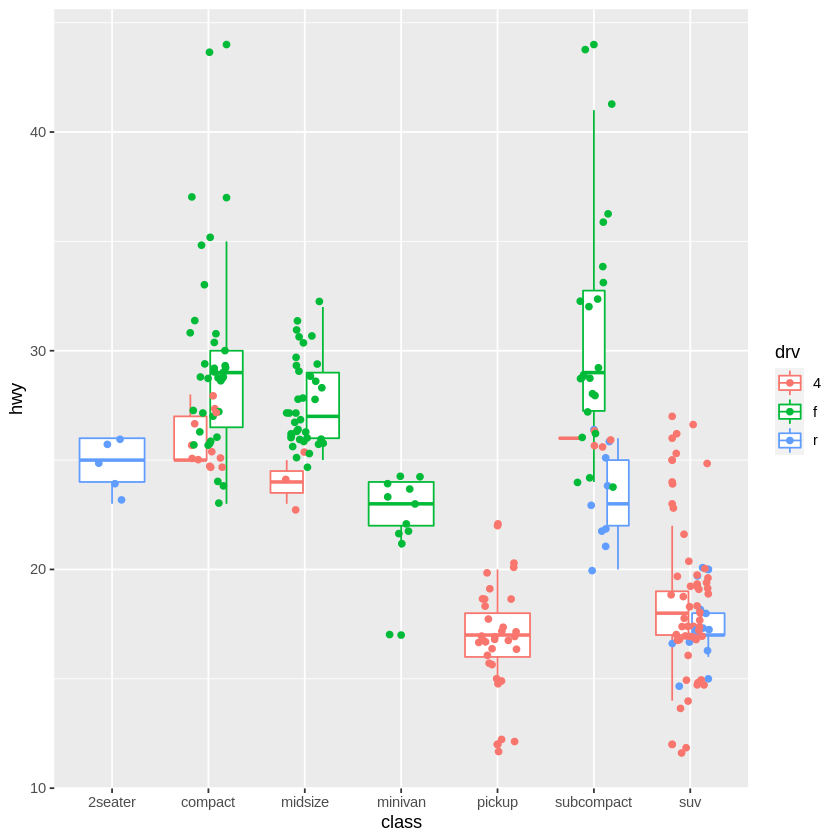

In [ ]:
ggplot(mpg, aes(class, hwy)) +
    geom_boxplot(aes(colour = drv), outlier.shape = NA) + 
    geom_jitter(aes(colour = drv), width = 0.2)

### 바이올린 도표

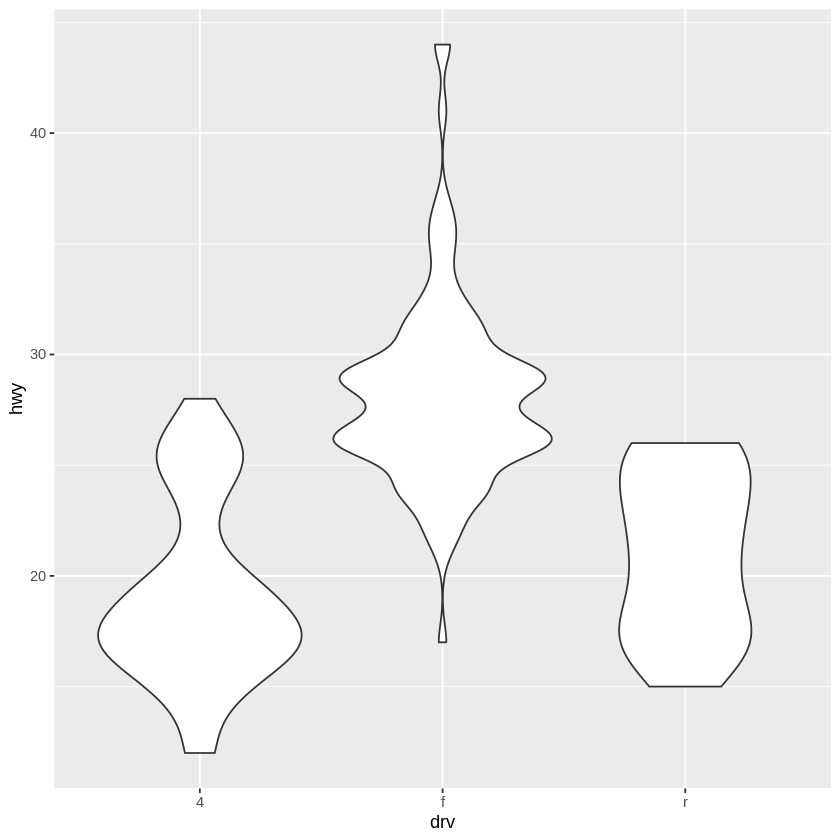

In [ ]:
ggplot(mpg, aes(x = drv, y = hwy)) + geom_violin()

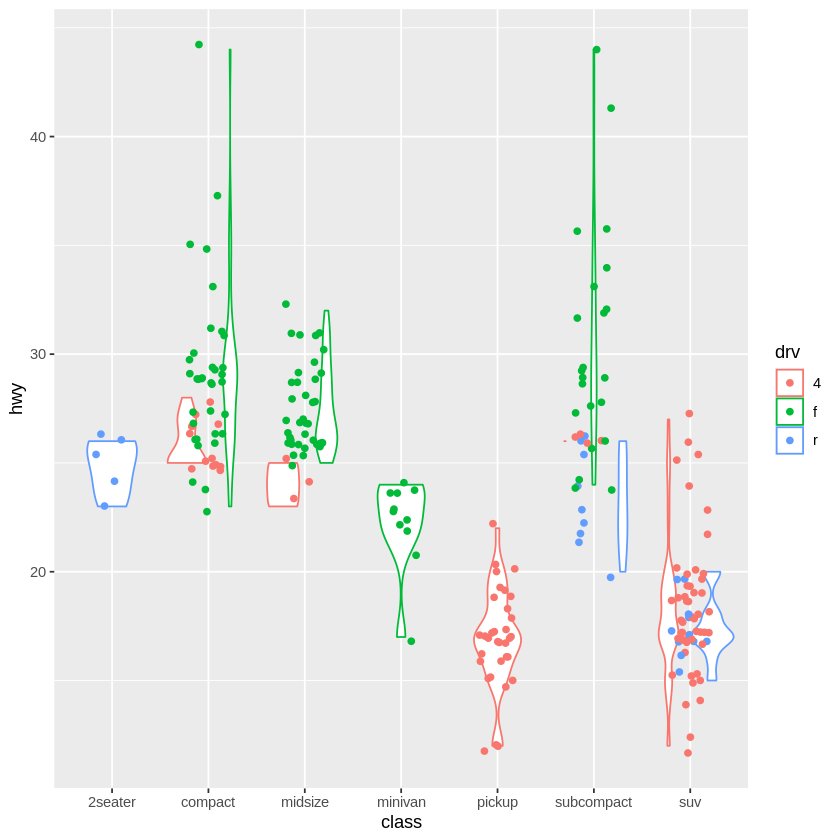

In [ ]:
ggplot(mpg, aes(class, hwy)) +
    geom_violin(aes(colour = drv)) + 
    geom_jitter(aes(colour = drv), width = 0.2)

## 비율의 시각화 (Proportions)

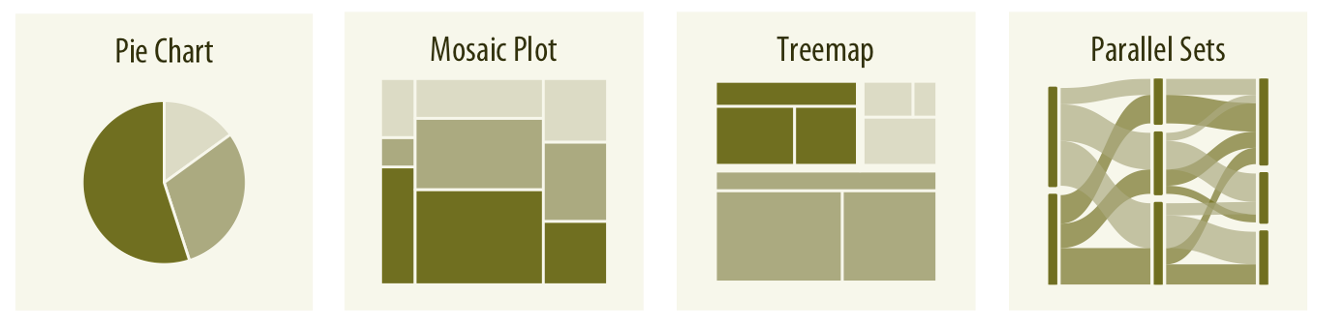

### 파이차트

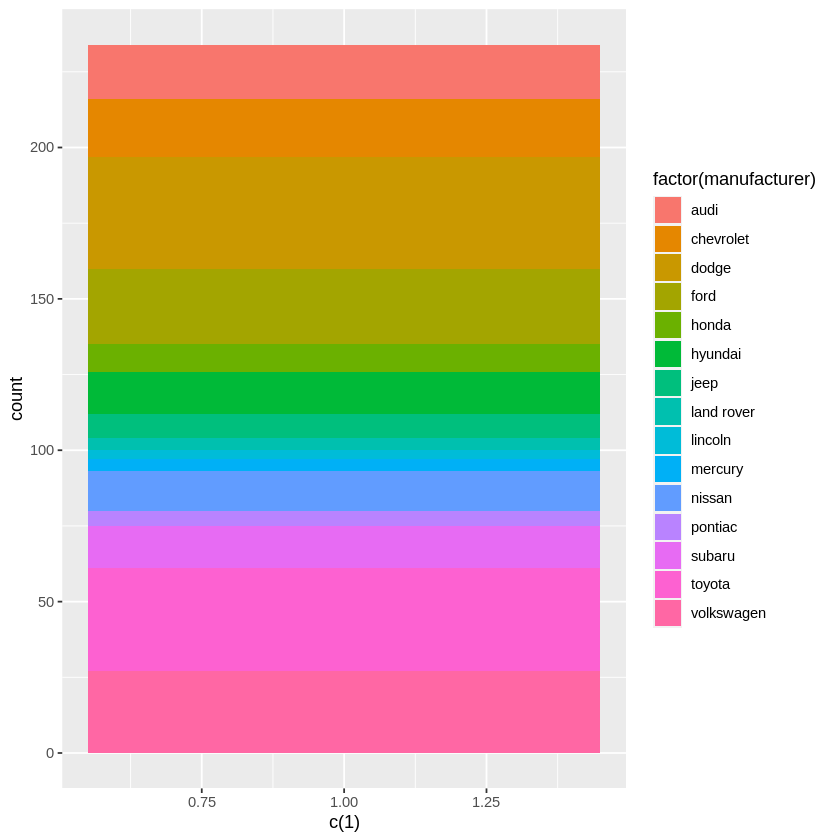

In [ ]:
# 누적 막대그래프 생성
ggplot(mpg, aes(c(1))) + geom_bar(aes(fill = factor(manufacturer)))

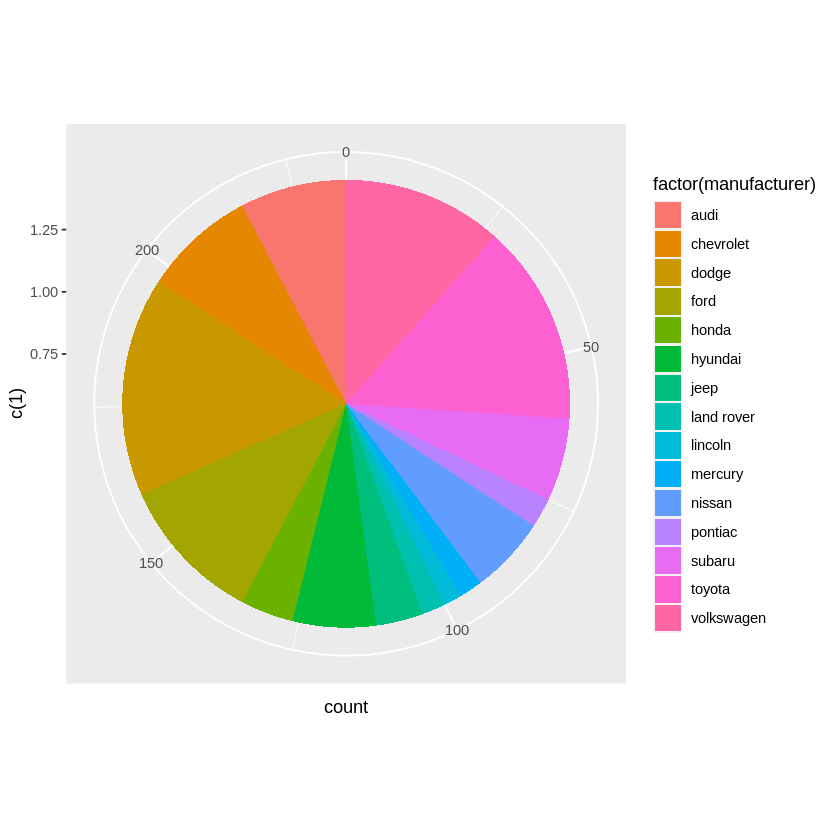

In [ ]:
ggplot(mpg, aes(c(1))) + geom_bar(aes(fill = factor(manufacturer))) + coord_polar('y')

### 모자이크 도표

In [ ]:
# 타이타닉 데이터
str(Titanic)

 'table' num [1:4, 1:2, 1:2, 1:2] 0 0 35 0 0 0 17 0 118 154 ...
 - attr(*, "dimnames")=List of 4
  ..$ Class   : chr [1:4] "1st" "2nd" "3rd" "Crew"
  ..$ Sex     : chr [1:2] "Male" "Female"
  ..$ Age     : chr [1:2] "Child" "Adult"
  ..$ Survived: chr [1:2] "No" "Yes"


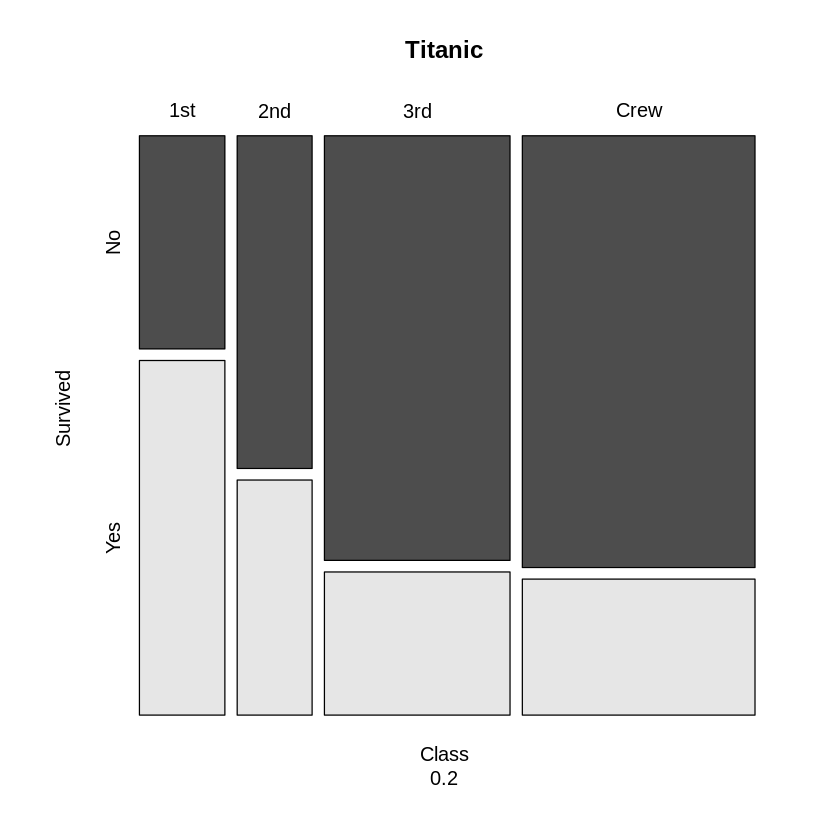

In [ ]:
mosaicplot(~ Class + Survived, data = Titanic, color = TRUE, cex = 1,.2)

## x-y 관계 시각화 (Relationships)

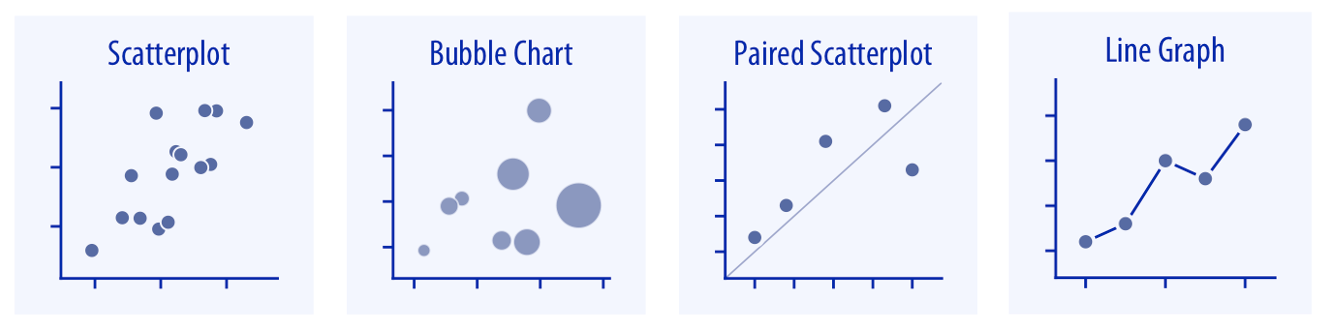

### 산점도

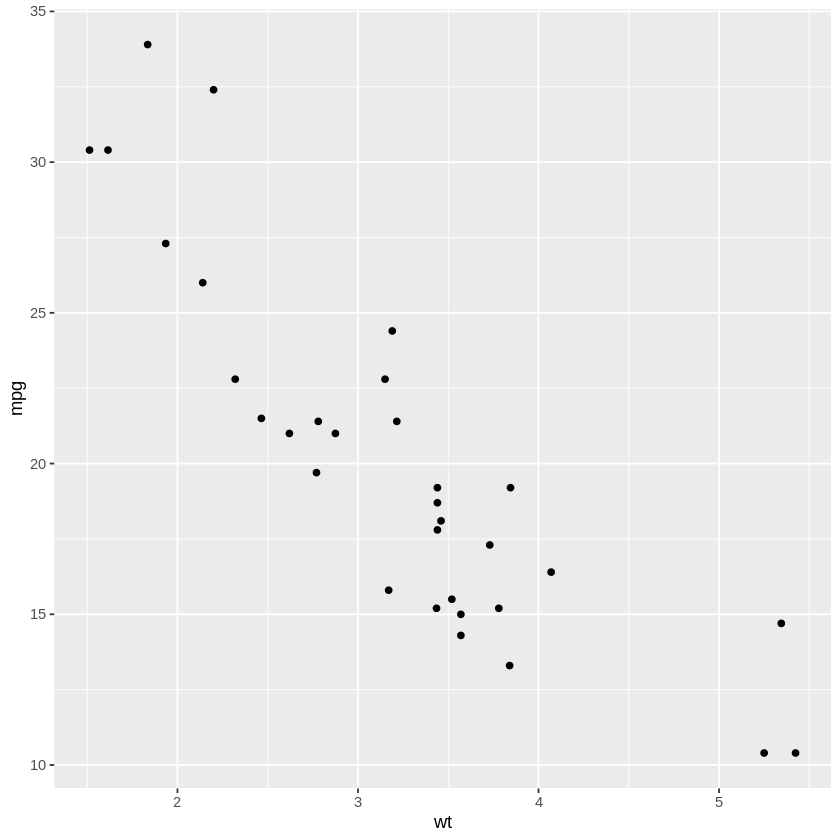

In [ ]:
ggplot(mtcars, aes(x = wt, y = mpg)) + geom_point()

### 버블차트

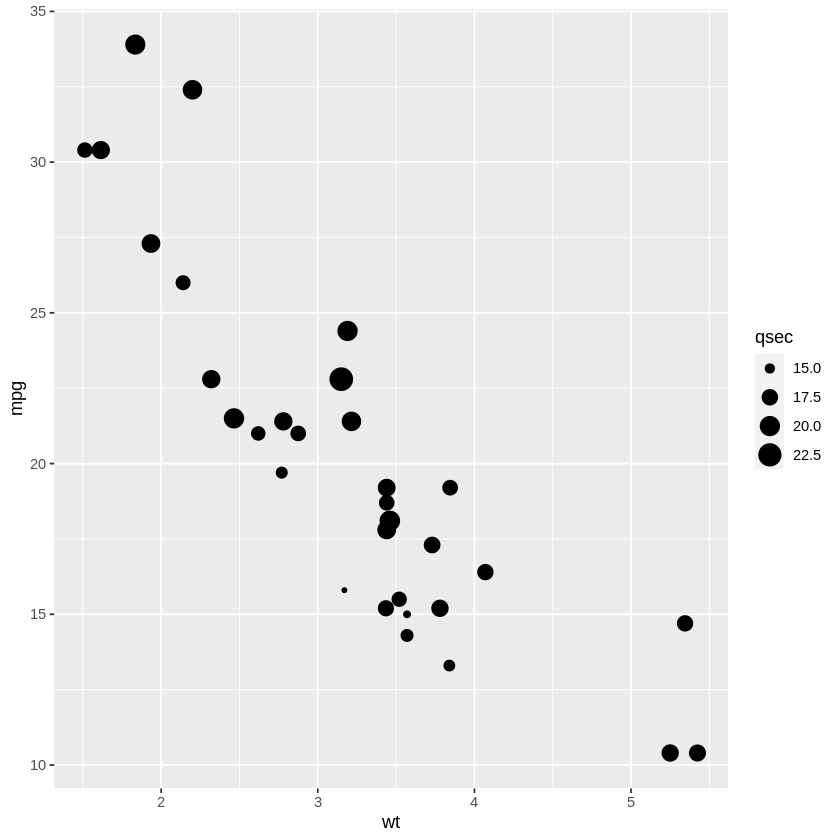

In [ ]:
ggplot(mtcars, aes(x = wt, y = mpg)) + geom_point(aes(size = qsec))

### 선 그래프

In [ ]:
# economics 데이터 : 미국의 월별 경제 지표(날짜, 인구수, 개인 소비 지출액 등)
str(economics)

spec_tbl_df [574 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ date    : Date[1:574], format: "1967-07-01" "1967-08-01" ...
 $ pce     : num [1:574] 507 510 516 512 517 ...
 $ pop     : num [1:574] 198712 198911 199113 199311 199498 ...
 $ psavert : num [1:574] 12.6 12.6 11.9 12.9 12.8 11.8 11.7 12.3 11.7 12.3 ...
 $ uempmed : num [1:574] 4.5 4.7 4.6 4.9 4.7 4.8 5.1 4.5 4.1 4.6 ...
 $ unemploy: num [1:574] 2944 2945 2958 3143 3066 ...


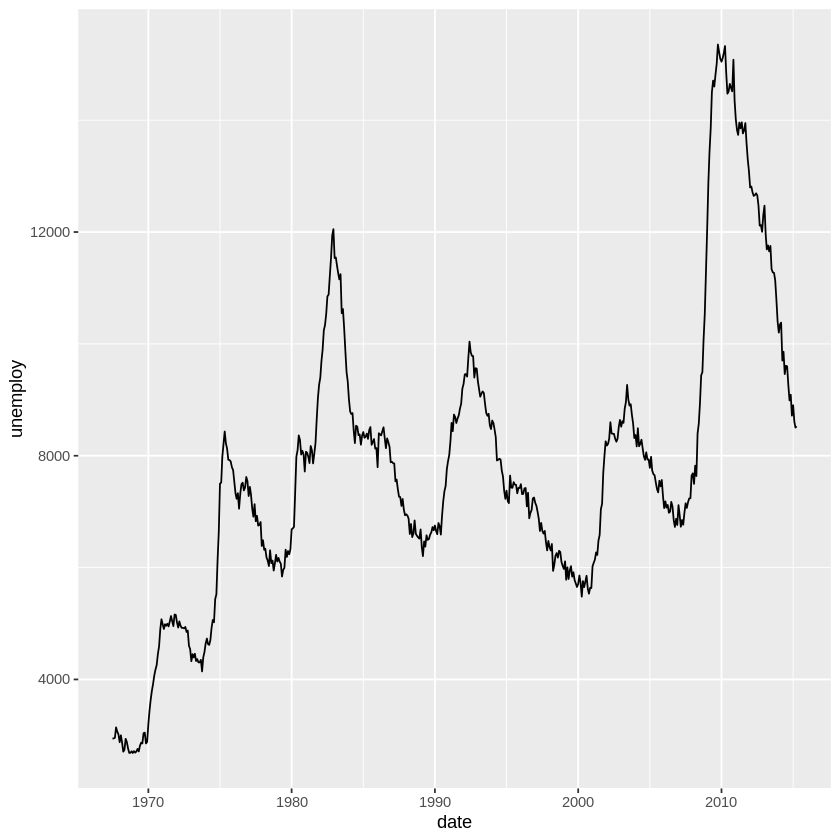

In [ ]:
ggplot(economics, aes(x = date, y = unemploy)) + geom_line()

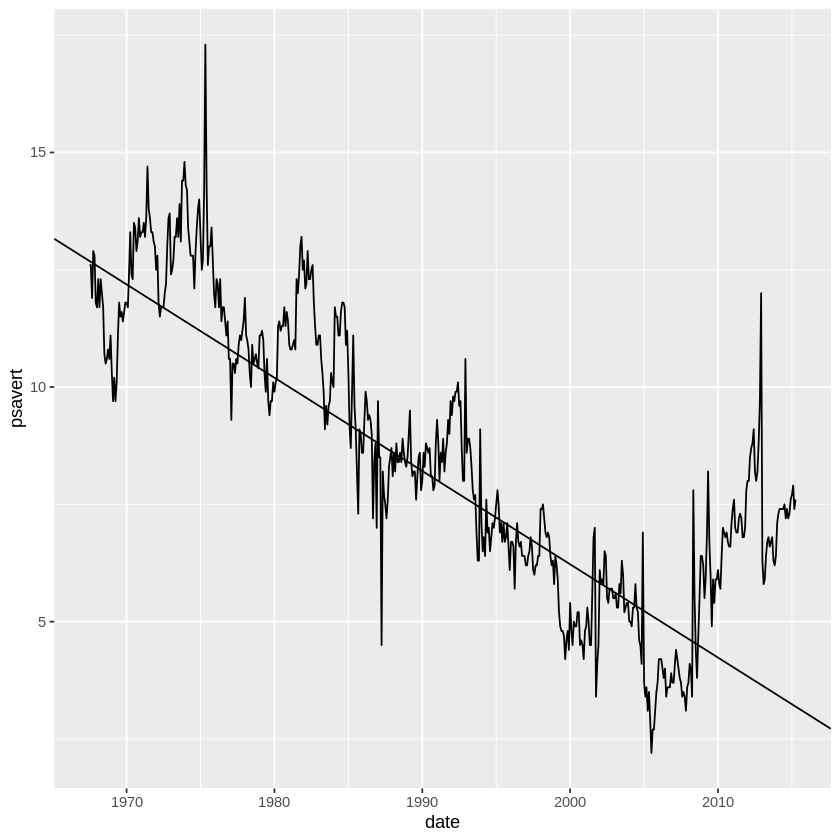

In [ ]:
# 직선 추가하기
ggplot(economics, aes(x = date, y = psavert)) + 
    geom_line() + 
    geom_abline(intercept = 12.18671, slope = -0.0005444)